# Python Tweepy Crawler

In [23]:
#lga, about kfc restaurant
import json
lga_feature = open('C:/Users/LC/Desktop/Fast food research/aus_lga.json','r')
lga_json = json.loads(lga_feature.read())

formatlatlon = []
lgacode = []
lganame = []
for lga_col in lga_json['features']:
    alllat = 0
    alllon = 0
    if lga_col['properties']['STATE_CODE'] == u'2':
        if len(lga_col['geometry']['coordinates'][0][0]) > 2:
            for onepoly in lga_col['geometry']['coordinates'][0]:
                lgacode.append(lga_col['properties']['LGA_CODE11'])
                lganame.append(lga_col['properties']['LGA_NAME11'])
                formatlatlon.append(onepoly)
        else:
            lgacode.append(lga_col['properties']['LGA_CODE11'])
            lganame.append(lga_col['properties']['LGA_NAME11'])
            formatlatlon.append(lga_col['geometry']['coordinates'][0])
    
def isInsidePolygon(pt, poly):
    c = False
    i = -1
    l = len(poly)
    j = l - 1
    while i < l-1:
        i += 1
        #print i,poly[i], j,poly[j]
        if ((poly[i][0] <= pt[0] and pt[0] < poly[j][0]) or (poly[j][0] <= pt[0] and pt[0] < poly[i][0])):
            if (pt[1] < (poly[j][1] - poly[i][1]) * (pt[0] - poly[i][0]) / (poly[j][0] - poly[i][0]) + poly[i][1]):
                c = not c
        j = i
    return c

def calbest(latlongroup,point):
    for numpoly in range(len(latlongroup)):
        if isInsidePolygon(point,latlongroup[numpoly]):
            #print isInsidePolygon(point,latlongroup[numpoly]),lgacode[numpoly],lganame[numpoly]
            return [lgacode[numpoly],lganame[numpoly]]

In [24]:
from sklearn.feature_extraction import DictVectorizer

def get_BOW(text):
    BOW = {}
    for word in text:
        BOW[word] = BOW.get(word,0) + 1
    return BOW

In [25]:
import csv
f = open("C:/Users/LC/Desktop/Fast food research/mel_ff.csv")
f_csv = csv.reader(f)
ta_info = []
latloninfo = []
for info in f_csv:
    latlon = []
    new_info = []
    new_info.extend(info)
    if info[2] == 'lon':
        continue
    else:
        latlon.append(float(info[2]))
        latlon.append(float(info[1]))
    if calbest(formatlatlon,latlon) == None:
        new_info.extend([' ',' '])
    else:
        new_info.extend(calbest(formatlatlon,latlon))
        latloninfo.append(calbest(formatlatlon,latlon))
    ta_info.append(new_info)
f.close()
print len(ta_info)

762


In [26]:
ffsa2_name = []
for a in latloninfo:
    ffsa2_name.append(a[1])
    
latlonbow = get_BOW(ffsa2_name)
kfcrl = sorted(latlonbow.items(), lambda x, y: cmp(x[1], y[1]), reverse=True)
print len(kfcrl)
print kfcrl

33
[(u'Melbourne (C)', 53), (u'Casey (C)', 47), (u'Hume (C)', 41), (u'Wyndham (C)', 38), (u'Brimbank (C)', 38), (u'Whittlesea (C)', 35), (u'Kingston (C)', 34), (u'Monash (C)', 31), (u'Mornington Peninsula (S)', 31), (u'Greater Dandenong (C)', 31), (u'Frankston (C)', 29), (u'Knox (C)', 29), (u'Melton (S)', 27), (u'Whitehorse (C)', 25), (u'Moonee Valley (C)', 22), (u'Darebin (C)', 22), (u'Stonnington (C)', 21), (u'Boroondara (C)', 20), (u'Maroondah (C)', 19), (u'Yarra Ranges (S)', 17), (u'Cardinia (S)', 16), (u'Banyule (C)', 15), (u'Glen Eira (C)', 15), (u'Maribyrnong (C)', 14), (u'Manningham (C)', 14), (u'Port Phillip (C)', 14), (u'Moreland (C)', 14), (u'Yarra (C)', 14), (u'Hobsons Bay (C)', 13), (u'Nillumbik (S)', 7), (u'Bass Coast (S)', 7), (u'Bayside (C)', 6), (u'Greater Geelong (C)', 1)]


In [30]:
import json
import codecs
containfatkword = open('E:/labelledTwitter.json','r')
alltext = []
sa2_list = []
allpoint = []
for line in containfatkword:
    coorpoint = []
    new = json.loads(line, encoding='utf8')
    if len(new['label']) == 12:
        alltext.append(new['text'])
#     coorpoint.append(float(line['geo']['coordinates'][1]))
#     coorpoint.append(float(line['geo']['coordinates'][0]))
        coorpoint.append(float(new['coordinate'][1]))
        coorpoint.append(float(new['coordinate'][0]))

        z = -new['coordinate'][0]
        x = new['coordinate'][1]
        if z > 37.5:
            if z<38.5:
                if x > 144.5:
                    if x < 145.5:
                        allpoint.append(coorpoint)
        sa2_list.append(calbest(formatlatlon,coorpoint))
containfatkword.close()
print len(sa2_list)
print len(alltext)

37889
37889


In [31]:
print len(allpoint)

8498


In [32]:
import csv
fileHeader = ["lat","lon"]
csvFile = open("C:/Users/LC/Desktop/Fast food research/neural/lgatweetlocation.csv", "wb")
writer = csv.writer(csvFile)

writer.writerow(fileHeader)
for a in allpoint:
    writer.writerow(a)
csvFile.close()

In [6]:
sa2_namelist = []
for a in sa2_list:
    if a != None:
        sa2_namelist.append(a[1])
        
kfctw =sorted(get_BOW(sa2_namelist).items(), lambda x, y: cmp(x[1], y[1]), reverse=True)
print len(kfctw)

35


In [7]:
kfclt = []
for a in kfcrl:
    new = []
    new.extend(a)
    for b in kfctw:
        if a[0] == b[0]:
            new.append(b[1])
    kfclt.append(new)

In [8]:
print len(kfclt)
print kfclt

33
[[u'Melbourne (C)', 53, 3813], [u'Casey (C)', 47, 84], [u'Hume (C)', 41, 292], [u'Wyndham (C)', 38, 130], [u'Brimbank (C)', 38, 111], [u'Whittlesea (C)', 35, 91], [u'Kingston (C)', 34, 113], [u'Monash (C)', 31, 160], [u'Mornington Peninsula (S)', 31, 35], [u'Greater Dandenong (C)', 31, 79], [u'Frankston (C)', 29, 94], [u'Knox (C)', 29, 88], [u'Melton (S)', 27, 67], [u'Whitehorse (C)', 25, 75], [u'Moonee Valley (C)', 22, 125], [u'Darebin (C)', 22, 154], [u'Stonnington (C)', 21, 360], [u'Boroondara (C)', 20, 177], [u'Maroondah (C)', 19, 58], [u'Yarra Ranges (S)', 17, 109], [u'Cardinia (S)', 16, 23], [u'Banyule (C)', 15, 59], [u'Glen Eira (C)', 15, 168], [u'Maribyrnong (C)', 14, 151], [u'Manningham (C)', 14, 70], [u'Port Phillip (C)', 14, 723], [u'Moreland (C)', 14, 219], [u'Yarra (C)', 14, 606], [u'Hobsons Bay (C)', 13, 85], [u'Nillumbik (S)', 7, 17], [u'Bass Coast (S)', 7], [u'Bayside (C)', 6, 126], [u'Greater Geelong (C)', 1, 24]]


In [9]:
kfclinear = []
num_kfc = []
num_kfcrest = []
num_tweet = []
loc_name = []
for a in kfclt:
    if len(a) == 3:
        kfclinear.append(a)
        loc_name.append(a[0])
        num_kfc.append([a[1]])
        num_kfcrest.append(a[1])
        num_tweet.append(a[2])
print len(kfclinear)

32


In [10]:
#linear regression
import matplotlib.pyplot as plt  
import numpy as np   
from sklearn import datasets, linear_model  

In [11]:
#function to show the linear model
def show_linear_model(x,y):
    #Create linear regression object
    regr = linear_model.LinearRegression()
    regr.fit(x,y)
    plt.scatter(x,y,color = 'blue')
    plt.plot(x,regr.predict(x),color = 'red',linewidth = 4)
    plt.xticks((x))
    plt.yticks((y))
    plt.show()

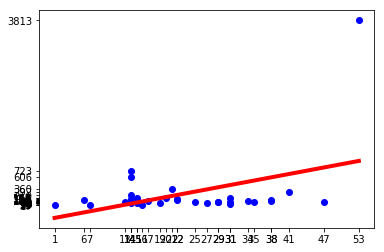

In [12]:
show_linear_model(num_kfc,num_tweet)

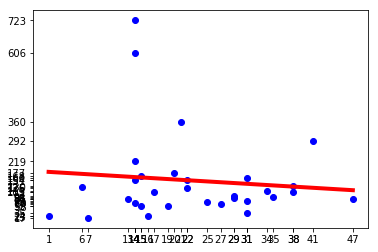

In [13]:
show_linear_model(num_kfc[1:],num_tweet[1:])

In [14]:
def pearsonSimilar(inA,inB):  
    if len(inA)<3:  
        return 1.0  
#     return 0.5+0.5*np.corrcoef(inA,inB,rowvar=0)[0][1]  
    return np.corrcoef(inA,inB,rowvar=0)[0][1] 

In [15]:
print pearsonSimilar(num_kfcrest,num_tweet)
print pearsonSimilar(num_kfcrest[1:],num_tweet[1:])

0.410109670853
-0.100511689445


In [16]:
print loc_name
print num_kfcrest
print num_tweet

[u'Melbourne (C)', u'Casey (C)', u'Hume (C)', u'Wyndham (C)', u'Brimbank (C)', u'Whittlesea (C)', u'Kingston (C)', u'Monash (C)', u'Mornington Peninsula (S)', u'Greater Dandenong (C)', u'Frankston (C)', u'Knox (C)', u'Melton (S)', u'Whitehorse (C)', u'Moonee Valley (C)', u'Darebin (C)', u'Stonnington (C)', u'Boroondara (C)', u'Maroondah (C)', u'Yarra Ranges (S)', u'Cardinia (S)', u'Banyule (C)', u'Glen Eira (C)', u'Maribyrnong (C)', u'Manningham (C)', u'Port Phillip (C)', u'Moreland (C)', u'Yarra (C)', u'Hobsons Bay (C)', u'Nillumbik (S)', u'Bayside (C)', u'Greater Geelong (C)']
[53, 47, 41, 38, 38, 35, 34, 31, 31, 31, 29, 29, 27, 25, 22, 22, 21, 20, 19, 17, 16, 15, 15, 14, 14, 14, 14, 14, 13, 7, 6, 1]
[3813, 84, 292, 130, 111, 91, 113, 160, 35, 79, 94, 88, 67, 75, 125, 154, 360, 177, 58, 109, 23, 59, 168, 151, 70, 723, 219, 606, 85, 17, 126, 24]


In [17]:
import csv
f = open("C:/Users/LC/Desktop/Fast food research/fat.csv")
fat_csv = csv.reader(f)

fatdata = []
for info in fat_csv:
    if info[0] == ' lga_code':
        print info
        continue
    else:
        if info[1] in loc_name:
            fatdata.append(info)
f.close()
print fatdata

[' lga_code', ' lga_name', ' ovrwgt_p_1_count']
[['20660', 'Banyule (C)', '37568'], ['20910', 'Bayside (C)', '29738'], ['21110', 'Boroondara (C)', '51385'], ['21180', 'Brimbank (C)', '56627'], ['21450', 'Cardinia (S)', '24997'], ['21610', 'Casey (C)', '79721'], ['21890', 'Darebin (C)', '44689'], ['22170', 'Frankston (C)', '39179'], ['22310', 'Glen Eira (C)', '42779'], ['22670', 'Greater Dandenong (C)', '42456'], ['22750', 'Greater Geelong (C)', '59253'], ['23110', 'Hobsons Bay (C)', '27773'], ['23270', 'Hume (C)', '52180'], ['23430', 'Kingston (C)', '46602'], ['23670', 'Knox (C)', '45973'], ['24210', 'Manningham (C)', '36545'], ['24330', 'Maribyrnong (C)', '24567'], ['24410', 'Maroondah (C)', '32622'], ['24600', 'Melbourne (C)', '32784'], ['24650', 'Melton (S)', '35478'], ['24970', 'Monash (C)', '54281'], ['25060', 'Moonee Valley (C)', '36092'], ['25250', 'Moreland (C)', '49486'], ['25340', 'Mornington Peninsula (S)', '46507'], ['25710', 'Nillumbik (S)', '18524'], ['25900', 'Port Phill

In [18]:
analydata = []
for i in range(len(loc_name)):
    new = []
    for b in fatdata:
        if loc_name[i] == b[1]:
            new.append(b[1])
            new.append(b[0])
            new.append(b[2])
    for a in kfclt:
        if loc_name[i] == a[0]:
            new.append(a[1])
            new.append(a[2])
    analydata.append(new)
print analydata

[['Melbourne (C)', '24600', '32784', 53, 3813], ['Casey (C)', '21610', '79721', 47, 84], ['Hume (C)', '23270', '52180', 41, 292], ['Wyndham (C)', '27260', '56533', 38, 130], ['Brimbank (C)', '21180', '56627', 38, 111], ['Whittlesea (C)', '27070', '54903', 35, 91], ['Kingston (C)', '23430', '46602', 34, 113], ['Monash (C)', '24970', '54281', 31, 160], ['Mornington Peninsula (S)', '25340', '46507', 31, 35], ['Greater Dandenong (C)', '22670', '42456', 31, 79], ['Frankston (C)', '22170', '39179', 29, 94], ['Knox (C)', '23670', '45973', 29, 88], ['Melton (S)', '24650', '35478', 27, 67], ['Whitehorse (C)', '26980', '48270', 25, 75], ['Moonee Valley (C)', '25060', '36092', 22, 125], ['Darebin (C)', '21890', '44689', 22, 154], ['Stonnington (C)', '26350', '33008', 21, 360], ['Boroondara (C)', '21110', '51385', 20, 177], ['Maroondah (C)', '24410', '32622', 19, 58], ['Yarra Ranges (S)', '27450', '43942', 17, 109], ['Cardinia (S)', '21450', '24997', 16, 23], ['Banyule (C)', '20660', '37568', 15, 

In [19]:
import csv
fileHeader = ["lga_name","lga_code","aurin_data","num_fastfood","num_tweet"]
csvFile = open("C:/Users/LC/Desktop/Fast food research/neural/lgainfo.csv", "wb")
writer = csv.writer(csvFile)

writer.writerow(fileHeader)
for a in analydata:
    writer.writerow(a)
csvFile.close()

In [20]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [21]:
import seaborn as sns
sns.set(color_codes=True)

In [22]:
fatcsv = sns.load_dataset("lgaonlydata")

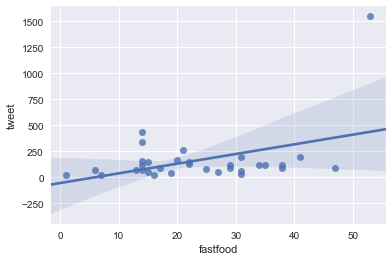

In [74]:
sns.regplot(x="fastfood", y="tweet", data=fatcsv);

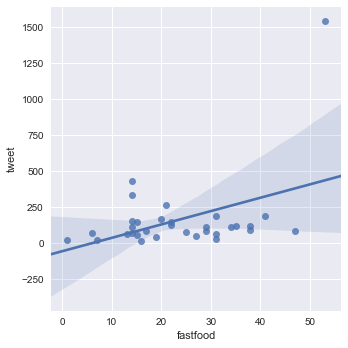

In [76]:
sns.lmplot(x="fastfood", y="tweet", data=fatcsv);

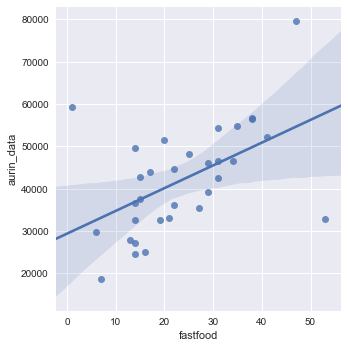

In [78]:
sns.lmplot(x="fastfood", y="aurin_data", data=fatcsv);

In [10]:
x = np.random.normal(size=100)
sns.distplot(x);

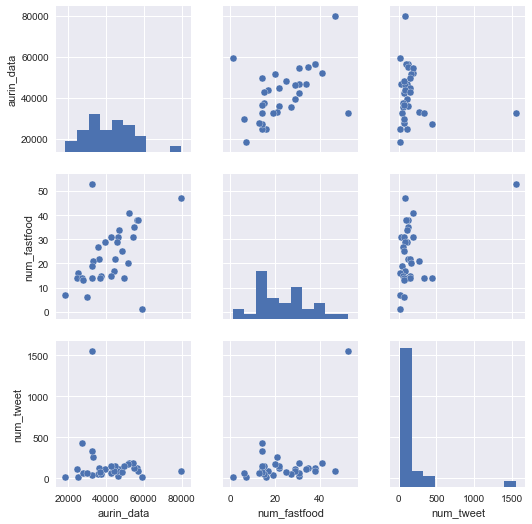

In [65]:
iris = sns.load_dataset("lgaonlydata")  
sns.pairplot(iris)

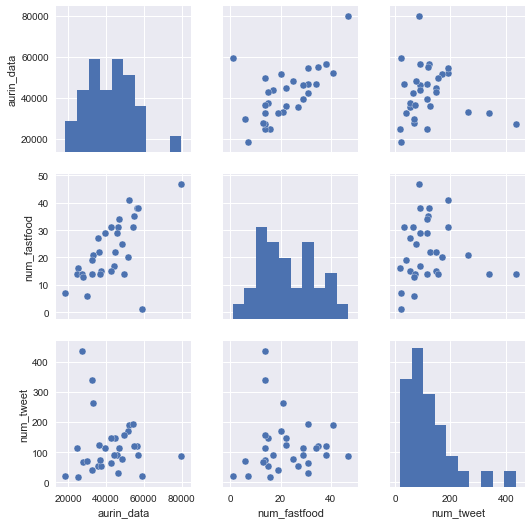

In [67]:
iris = sns.load_dataset("lganom")  
sns.pairplot(iris)